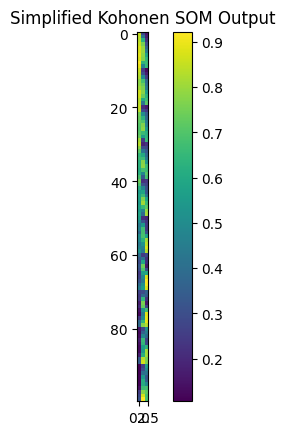

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random input data (100 samples with 3 features)
data = np.random.rand(100, 3)

# Step 2: Initialize SOM grid (10x10 neurons), each with 3 weights
som_x, som_y = 10, 10
input_len = 3
weights = np.random.rand(som_x, som_y, input_len)

# Step 3: Set training parameters
learning_rate = 0.5
radius = max(som_x, som_y) / 2
radius_decay = 0.99
learning_rate_decay = 0.99
num_iterations = 1000

# Step 4: Train the SOM
for iteration in range(num_iterations):
    # Pick a random sample
    sample = data[np.random.randint(0, len(data))]

    # Find Best Matching Unit (BMU)
    distances = np.linalg.norm(weights - sample, axis=-1)
    bmu_index = np.unravel_index(np.argmin(distances), (som_x, som_y))

    # Update weights of BMU and its neighbors
    for i in range(som_x):
        for j in range(som_y):
            dist_to_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu_index))
            if dist_to_bmu <= radius:
                influence = np.exp(-dist_to_bmu**2 / (2 * (radius**2)))
                weights[i, j] += influence * learning_rate * (sample - weights[i, j])

    # Decay learning rate and radius
    learning_rate *= learning_rate_decay
    radius *= radius_decay

# Step 5: Visualize SOM as color grid
flat_weights = weights.reshape(som_x * som_y, input_len)
plt.imshow(flat_weights, cmap='viridis')
plt.colorbar()
plt.title("Simplified Kohonen SOM Output")
plt.show()
